In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import random as rd

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn import preprocessing

In [27]:
import matplotlib.pyplot as plt

# GENERATE DATA

In [6]:
market_cap = ['market_cap' + str(i) for i in range(1,101)]

In [7]:
wt = ['wt' + str(i) for i in range(1,6)]

In [8]:
ko = ['ko' + str(i) for i in range(1,6)]

In [9]:
data = pd.DataFrame(columns=[*wt, *ko], index=market_cap)

In [12]:
for mc in data.index:
    data.loc[mc,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[mc,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

# PCA

In [20]:
scaled_data = preprocessing.scale(data.T) #UNTUK MELAKUKAN PEMUSATAN DAN MELAKUKAN SCALING (NORMALISASI) TERHADAP DATA 

In [21]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [23]:
var = np.round(pca.explained_variance_ratio_*100, decimals=1)  #KALKULASI PERSENTASE DARI VARIASI UNTUK SETIAP PRINCIPAL COMPONENT

In [24]:
labels = ['PC' + str(x) for x in range(1, len(var)+1)]

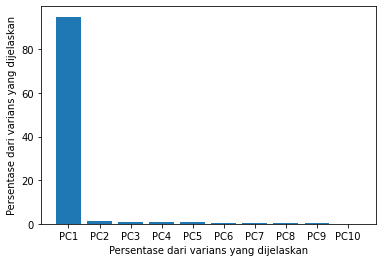

In [30]:
plt.bar(x=range(1,len(var)+1), height=var, tick_label=labels)
plt.ylabel('Persentase dari varians yang dijelaskan')
plt.xlabel('Persentase dari varians yang dijelaskan')
plt.show()

In [31]:
#HAMPIR SELURUH VARIANS TERBESAR BERADA DI PC1 SEHINGGA PC1 dan PC2 SEHARUSNYA MAMPU MEWAKILI ORIGINAL DATA (2D GRAPH)

# PCA PLOT

In [33]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

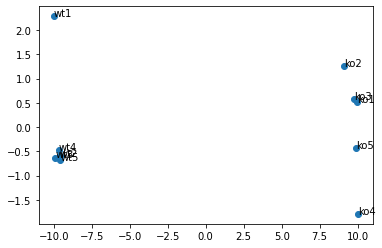

In [36]:
plt.scatter(pca_df.PC1, pca_df.PC2)
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [40]:
#nilai wt berada di sisi kiri menunjukkan bahwa data data tersebut saling berkorelasi
#nilai nilai ko berada di sisi kanan menunjukkan bahwa data data tersebut juga saling kerkorelasi
#jarak antara cluster wt dan ko sangat jauh menunjukkan bahwa sample sample data mereka sangat jauh
